## ProsperLoan Data Analysis

### Load packages

In [62]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks

%matplotlib inline

### Read the data

In [63]:
df = pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [64]:
print(" the number of rows {} and columns are {}".format(df.shape[0], df.shape[1]))

 the number of rows 113937 and columns are 81


In [65]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [66]:
# Examine columns, missing values, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

* There are missing values but let us focus only few variables that are listed below.

In [67]:
# Due to many variables in this dataset, I only use few variables. Those are:  
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [68]:
loan_df = df[cols]

In [69]:
loan_df.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

In [70]:
loan_df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,113937.000000,84853.000000,113912.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,1.139370e+05,113937.000000,113937.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.168661,0.218828,0.192764,4.072243,5.950067,2.774209,96.071582,5.608026e+03,272.475783,0.048027,0.275947,8337.01385,0.998584,80.475228
std,10.436212,0.068467,0.080364,0.074818,1.673227,2.376501,3.996797,94.480605,7.478497e+03,192.697812,0.332353,0.551759,6245.80058,0.017919,103.239020
min,12.000000,-0.182700,0.006530,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.00000,0.700000,1.000000
25%,36.000000,0.115670,0.156290,0.134000,3.000000,4.000000,1.000000,26.000000,3.200333e+03,131.620000,0.000000,0.140000,4000.00000,1.000000,2.000000
50%,36.000000,0.161500,0.209760,0.184000,4.000000,6.000000,1.000000,67.000000,4.666667e+03,217.740000,0.000000,0.220000,6500.00000,1.000000,44.000000
75%,36.000000,0.224300,0.283810,0.250000,5.000000,8.000000,3.000000,137.000000,6.825000e+03,371.580000,0.000000,0.320000,12000.00000,1.000000,115.000000
max,60.000000,0.319900,0.512290,0.497500,7.000000,11.000000,20.000000,755.000000,1.750003e+06,2251.510000,39.000000,10.010000,35000.00000,1.012500,1189.000000


In [71]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
EstimatedEffectiveYield      84853 non-null float64
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
Recommendations              113937 non-null int64
DebtToIn

* As this project is all about visualization, for simplicity purpose I am going to delete all the null rows from the above data

In [72]:
loan_df = loan_df.dropna()

In [73]:
loan_df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.166738,0.223901,0.193621,4.132413,6.080246,3.302259,104.578028,6002.833586,296.421859,0.016571,0.258032,9294.999410,0.998131,69.998517
std,11.744005,0.067595,0.079372,0.074088,1.661460,2.360640,4.396670,95.836443,5110.743506,189.674943,0.187732,0.320587,6413.404265,0.020572,97.801415
min,12.000000,-0.181600,0.045830,0.040000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1000.000000,0.700000,1.000000
25%,36.000000,0.114800,0.161570,0.134900,3.000000,4.000000,1.000000,32.000000,3583.333333,159.062500,0.000000,0.150000,4000.000000,1.000000,1.000000
50%,36.000000,0.157670,0.215660,0.184500,4.000000,6.000000,1.000000,76.000000,5041.666667,257.760000,0.000000,0.220000,8000.000000,1.000000,32.000000
75%,60.000000,0.219000,0.287800,0.254900,5.000000,8.000000,3.000000,150.000000,7250.000000,392.420000,0.000000,0.320000,14603.250000,1.000000,100.000000
max,60.000000,0.319900,0.423950,0.360000,7.000000,11.000000,20.000000,755.000000,483333.333333,2251.510000,19.000000,10.010000,35000.000000,1.012500,1189.000000


In [74]:
loan_df.head(3)

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
1,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,2,Employed,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
3,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,16,Employed,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
4,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,2,Employed,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN


In [75]:
#convert term into category
loan_df['Term'] = loan_df['Term'].astype('category')

In [76]:
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)

* The above data obtained is a final dataset, with no NULL values and this is my final working dataset.(TIDY dataset)

#### Identify the type of variables

In [77]:
loan_df.dtypes

Term                        category
LoanStatus                    object
EstimatedEffectiveYield      float64
BorrowerAPR                  float64
BorrowerRate                 float64
ProsperRating_Numeric        float64
ProsperRating_Alpha           object
ProsperScore                 float64
ListingCategory_Numeric        int64
EmploymentStatus              object
Occupation                    object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
IncomeVerifiable                bool
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
Recommendations                int64
DebtToIncomeRatio            float64
LoanOriginalAmount             int64
PercentFunded                float64
IncomeRange                   object
Investors                      int64
BorrowerState                 object
dtype: object

In [78]:
#Numeric attributes
num_loan_df = loan_df.loc[:, (loan_df.dtypes == np.float64) | (loan_df.dtypes == np.int64)]
num_loan_df.columns

Index(['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
       'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'Investors'],
      dtype='object')

In [79]:
#Categorical attributes
cat_loan_df = loan_df.loc[:, (loan_df.dtypes == 'object') | (loan_df.dtypes == 'category')]
cat_loan_df.columns


Index(['Term', 'LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus',
       'Occupation', 'IncomeRange', 'BorrowerState'],
      dtype='object')

#### What is the structure of this dataset?
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

For simplicity of the visualization I have looked at only few variables as the project objective itself says to focus on only few variables.


#### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the Loan outcome in the dataset.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that loan status will have huge impact with the background of the borrower like occupation, income , whether he is with homeown status and prosper rating. 

### Univariate Exploration



#### Categorical attributes only

In [80]:
loan_df.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating_Numeric', 'ProsperRating_Alpha',
       'ProsperScore', 'ListingCategory_Numeric', 'EmploymentStatus',
       'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState'],
      dtype='object')

In [81]:
loan_df['IsBorrowerHomeowner'].value_counts()

True     41454
False    34762
Name: IsBorrowerHomeowner, dtype: int64

In [82]:
loan_df['ProsperRating_Alpha'].value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_Alpha, dtype: int64

In [83]:
loan_df['IncomeRange'].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

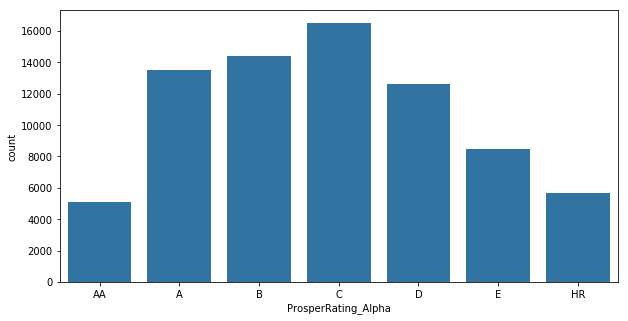

In [84]:
# From above it seems the order has to be maintained becuase this is an ordinal variable
plt.figure(figsize = [10, 5]) 
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ProsperRating_Alpha', color = base_color);

** ListingCategory: ** (Nominal Variable)

* The category of the listing that the borrower selected when posting their listing: 

    0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


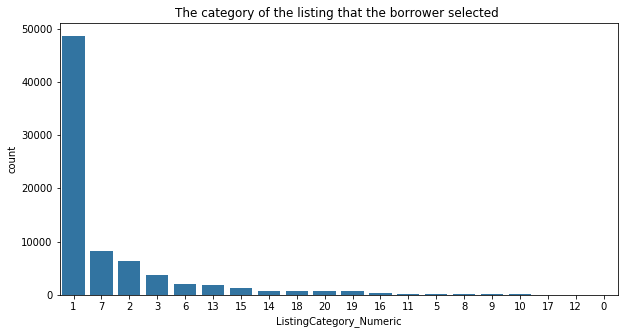

In [85]:
# ListingCategory_Numeric
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("The category of the listing that the borrower selected ")
sb.countplot(data = loan_df, x = 'ListingCategory_Numeric', color = base_color,
             order = loan_df['ListingCategory_Numeric'].value_counts().index );

In [86]:
loan_df['LoanStatus'].value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

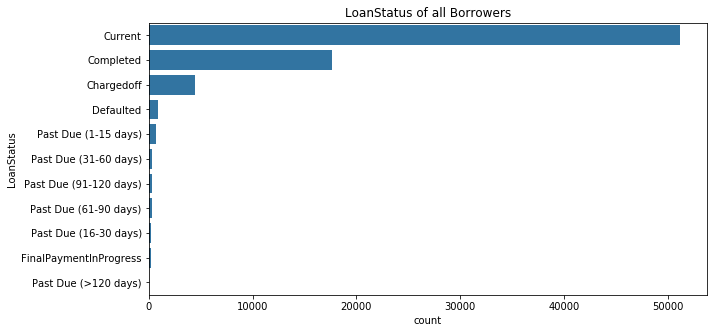

In [87]:
#'LoanStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color,
             order = loan_df['LoanStatus'].value_counts().index);

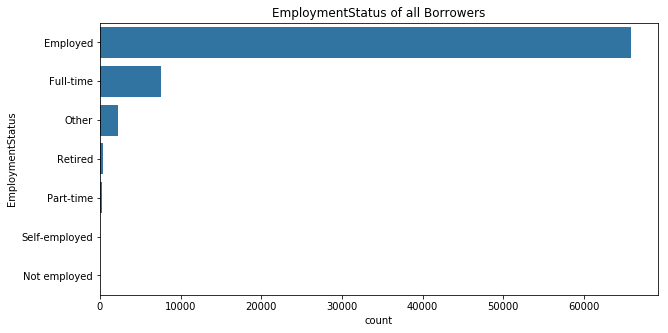

In [88]:
# 'EmploymentStatus'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color,
             order = loan_df['EmploymentStatus'].value_counts().index);

In [89]:
loan_df['IncomeRange'].value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Name: IncomeRange, dtype: int64

In [90]:
loan_df_1 = loan_df[loan_df['IncomeRange'] != 'Not employed']

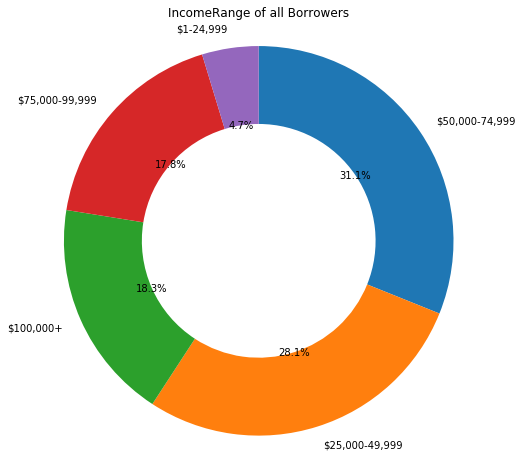

In [91]:
plt.figure(figsize = [15, 8])
sorted_counts = loan_df_1['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct   = '%.1f%%');
plt.title("IncomeRange of all Borrowers")
plt.axis('square');

In [92]:
loan_df['BorrowerState'].value_counts().head(10)

CA    9574
NY    5184
TX    5086
FL    4738
IL    3871
OH    3061
GA    3006
VA    2530
NJ    2463
PA    2416
Name: BorrowerState, dtype: int64

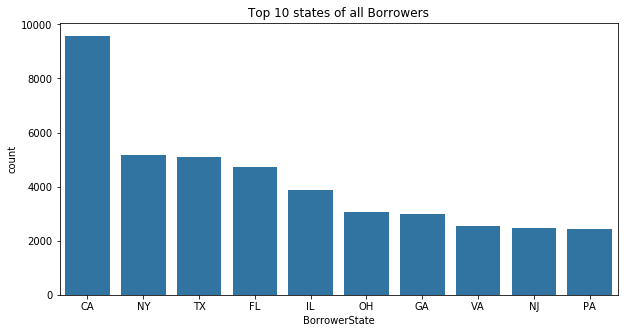

In [93]:
# BorrowerState
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'BorrowerState', color = base_color,
             order = loan_df['BorrowerState'].value_counts().head(10).index );
plt.title("Top 10 states of all Borrowers");

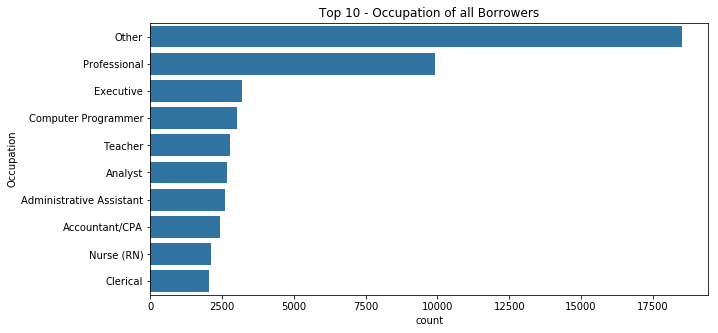

In [94]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, y = 'Occupation', color = base_color,
             order = loan_df['Occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");

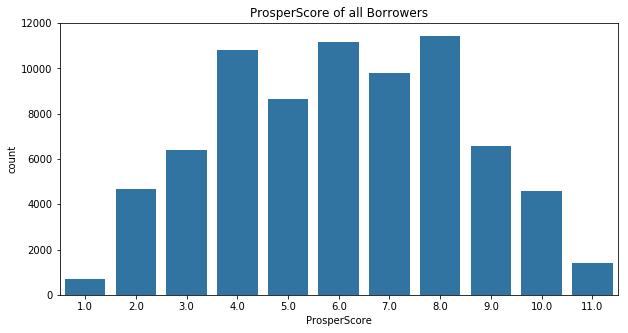

In [95]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ProsperScore', color = base_color);
plt.title("ProsperScore of all Borrowers");

### Insights with categorical variables analysis

* Loans with **"AA"** category are with lesser count

* The top 2 loan consideration reasons are **1 - Debt Consolidation**, **2 - Home Improvement**

* LoanStatus of all Borrowers are with **current** and **completed** state

* EmploymentStatus of all Borrowers are with **Employed** State

* Top IncomeRange of all Borrowers are within **$50,000-74,999**

* Top 2 states of all Borrowers are from **CA** and **NY**

* Majority of the borrowers are with an occupation of **Professional** and **Executive**

* Majority of the borrowers are with a rating or score from **4 to 8**

#### Now Let us Analyze the numeric attributes

* The variables that are numeric are 
   'Term', 'EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
   'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
   'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
   'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
   'PercentFunded', 'Investors'

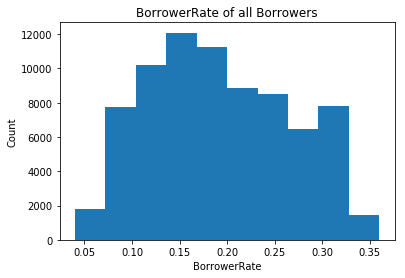

In [96]:
plt.hist(data = loan_df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate of all Borrowers");

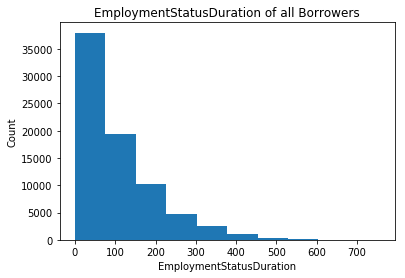

In [97]:
plt.hist(data = loan_df, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("EmploymentStatusDuration of all Borrowers");

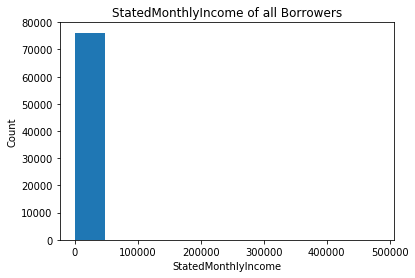

In [98]:
plt.hist(data = loan_df, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

In [99]:
(loan_df['StatedMonthlyIncome'].describe())

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [100]:
np.log10(loan_df['StatedMonthlyIncome'].describe())

count    4.882046
mean     3.778356
std      3.708484
min     -0.602060
25%      3.554287
50%      3.702574
75%      3.860338
max      5.684247
Name: StatedMonthlyIncome, dtype: float64

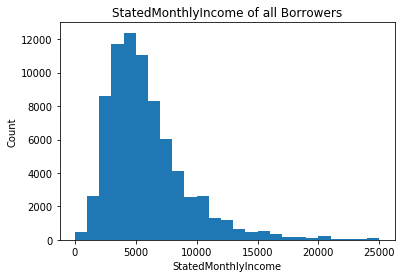

In [101]:
loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

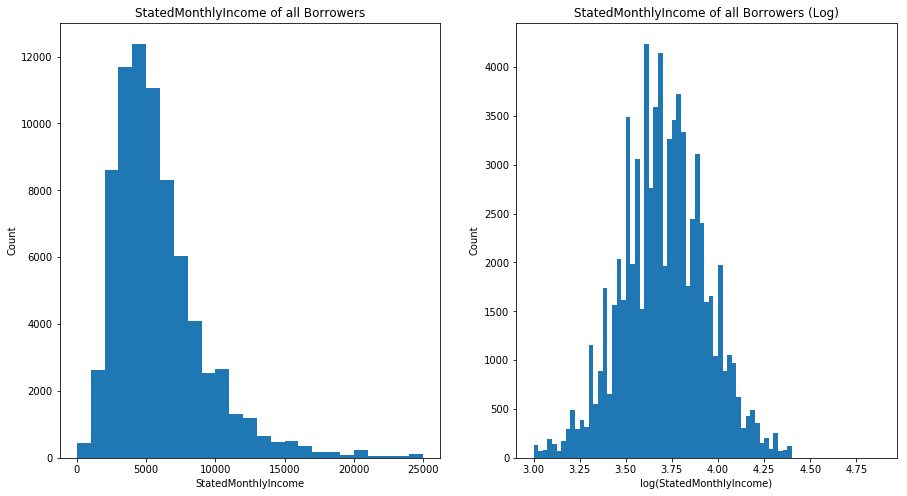

In [102]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =loan_df_sub, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df_sub['StatedMonthlyIncome']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(StatedMonthlyIncome)');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers (Log)");



# Without log transformation looks good on StatedMonthlyIncome

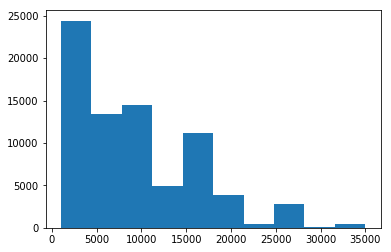

In [103]:
plt.hist(data = loan_df, x = 'LoanOriginalAmount');

In [104]:
(loan_df['LoanOriginalAmount'].describe())

count    76216.000000
mean      9294.999410
std       6413.404265
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [105]:
np.log10(loan_df['LoanOriginalAmount'].describe())

count    4.882046
mean     3.968249
std      3.807089
min      3.000000
25%      3.602060
50%      3.903090
75%      4.164450
max      4.544068
Name: LoanOriginalAmount, dtype: float64

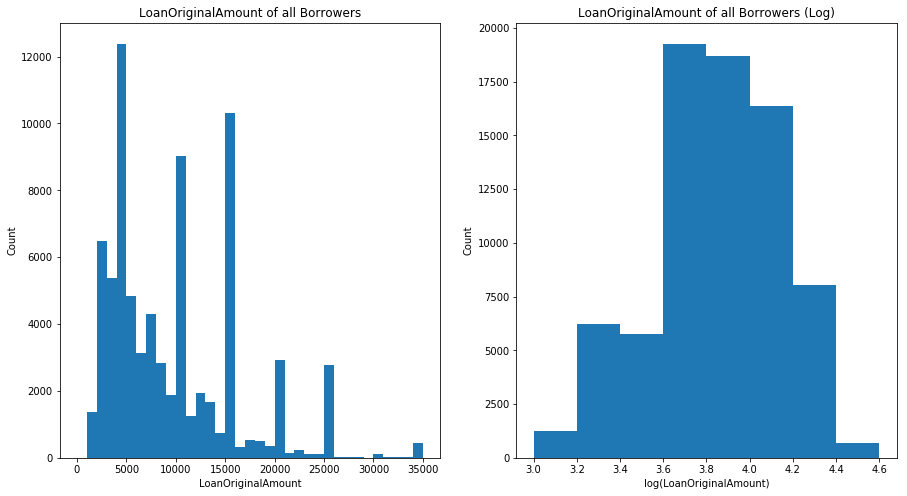

In [106]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(LoanOriginalAmount)');
plt.ylabel('Count');
plt.title("LoanOriginalAmount of all Borrowers (Log)");

loan_df['LoanOriginalAmount_log'] = np.log10(loan_df['LoanOriginalAmount'])

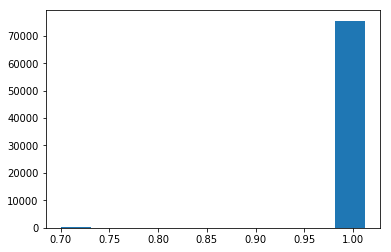

In [107]:
plt.hist(data = loan_df, x = 'PercentFunded');

In [108]:
loan_df['Investors'].min(), loan_df['Investors'].max(), 

(1, 1189)

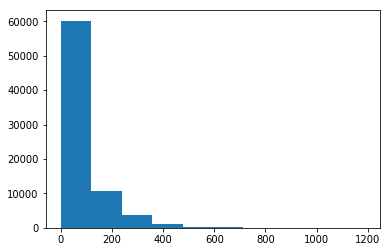

In [109]:
plt.hist(data = loan_df, x = 'Investors');

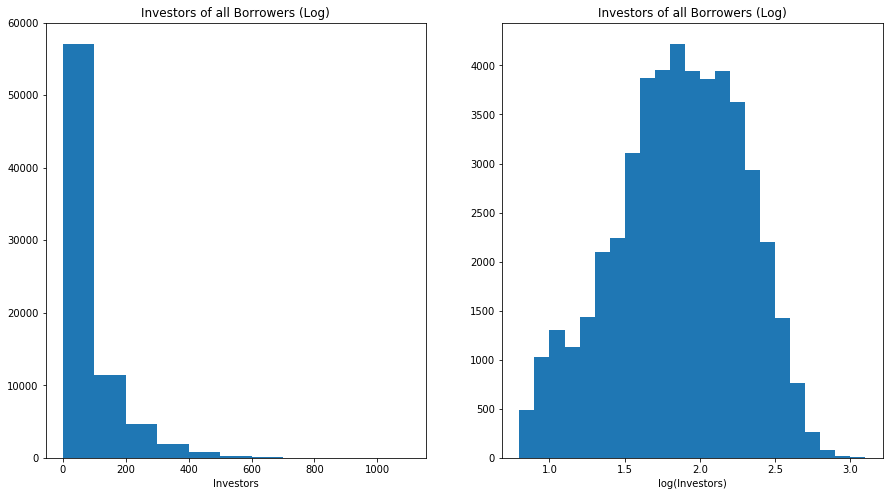

In [110]:
plt.figure(figsize = [15, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['Investors'].max()+10, 100)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers (Log)");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

loan_df['Investors_log'] = np.log10(loan_df['Investors'])

### Insights with Numerical variables analysis

* **BorrowerRate :**	*The Borrower's interest rate for this loan.* The borrowers rate follow an approximately unimodal distribution, with the peak around 0.16. There seems to be a spike that occurs around 0.32.
  
* **StatedMonthlyIncome :**	*The monthly income the borrower stated at the time the listing was created.*
 Monthly Income will definitely be right skewed since very few people will be having a higher salary. So I cut the outliers   and made the data to look at log 10 scales. Majority of the borrowers are having a salary with less than 10000 USD and the peak is observed at 5000 USD

* **LoanOriginalAmount:** The origination amount of the loan.Now this is interesting. Here we see that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD.

* **Investors:** Majority of the investors are between 0 and 100

### Bivariate Exploration

#### Relationship between two numeric variables

In [111]:
loan_df.dtypes

Term                        category
LoanStatus                    object
EstimatedEffectiveYield      float64
BorrowerAPR                  float64
BorrowerRate                 float64
ProsperRating_Numeric        float64
ProsperRating_Alpha         category
ProsperScore                 float64
ListingCategory_Numeric        int64
EmploymentStatus              object
Occupation                    object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
IncomeVerifiable                bool
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
Recommendations                int64
DebtToIncomeRatio            float64
LoanOriginalAmount             int64
PercentFunded                float64
IncomeRange                 category
Investors                      int64
BorrowerState                 object
LoanOriginalAmount_log       float64
Investors_log                float64
dtype: object

In [112]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors', 'LoanOriginalAmount_log',
                 'Investors_log']

numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors' ,'LoanOriginalAmount_log',
                 'Investors_log']

categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

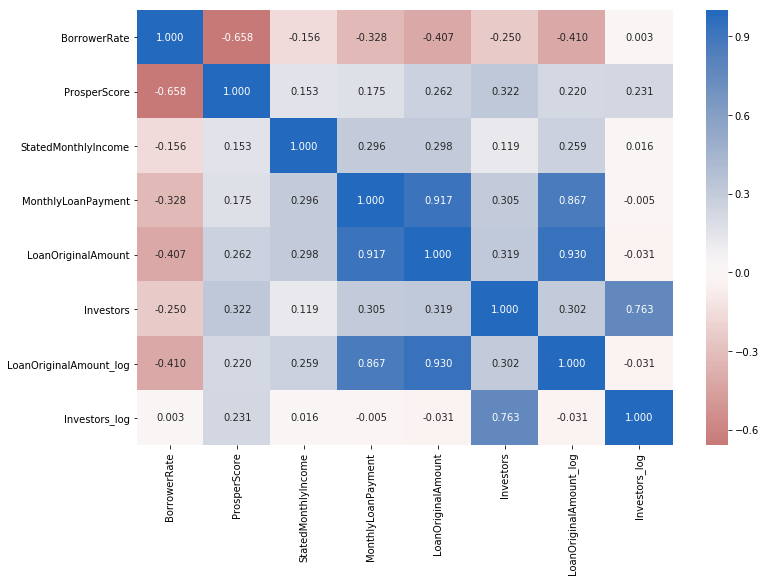

In [113]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Relationship between  numeric & categorical variables

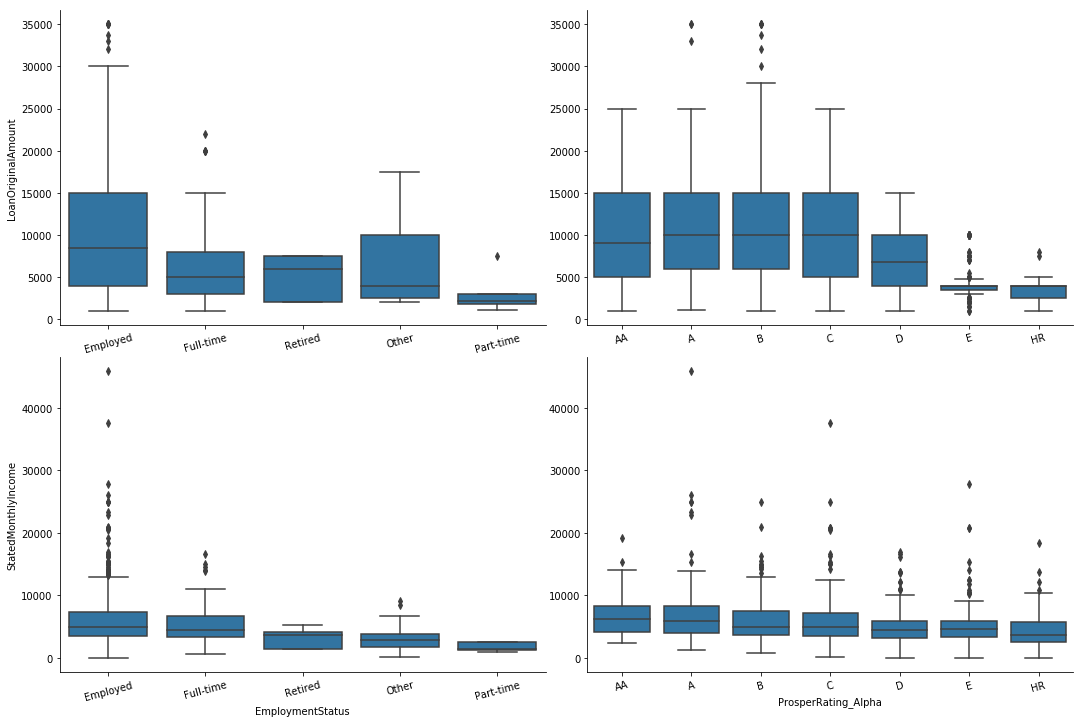

In [114]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_vars_1 = ['EmploymentStatus', 'ProsperRating_Alpha']
samples = np.random.choice(loan_df.shape[0], 2000, replace = False)
loan_df_samp = loan_df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """

    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_df_samp, y_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome'], 
                x_vars = categoric_vars_1, size = 5, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.show();

Text(0.5,1,'Income Range vs Loan Amount')

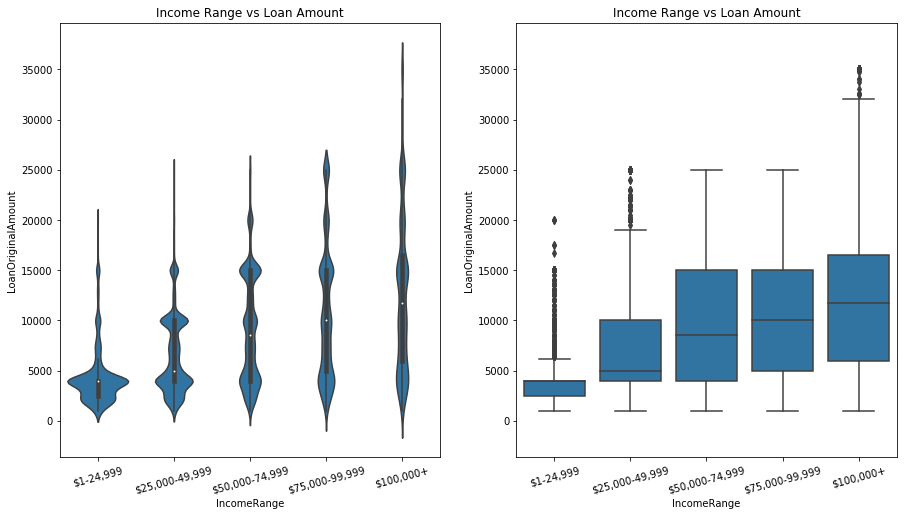

In [115]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

#### Categorical variables analysis

Text(0.5,1,'Count of Applicants w.r.t LoanStatus and HomeownerStatus')

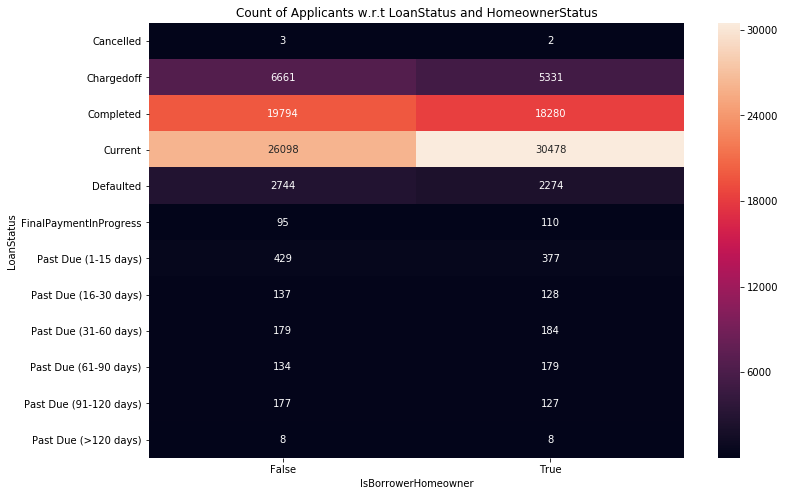

In [116]:
plt.figure(figsize = [12, 8])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanStatus and HomeownerStatus')

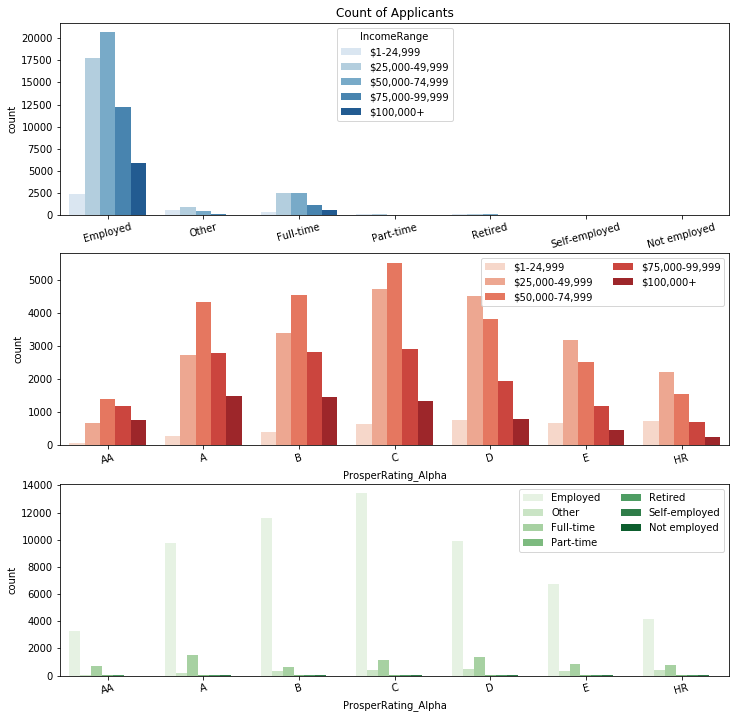

In [117]:
# since there's only three subplots to create, using the full data should be fine.
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

#### Insights about the entire Bivariate analysis

* Loan original amount and monthly loan payment is highly correlated and it is expected  and borrowers interest rate and proper score are highly correlated(-vely), Borrower interest rate and loanamount are -vely correlated.

* Majority of the borrowers with highest loan amount are taken by Employed, this is followed by others and fulltime employees

* The range of the salaries stated is higher for employed borrowers.

* LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range - 
  it is following a normal or expected trend that more salary borrowers are having higher loanoriginalamount 

* LoanStatus with current and completed have own homes when they applied for loans

* Majority of the loan applicants are from 50K to 75K range with emloyeed status

* Applicants with incomerange of 50K to 75K range have their prosper rating falling under AA, A, B and C 

### Multivariate Exploration

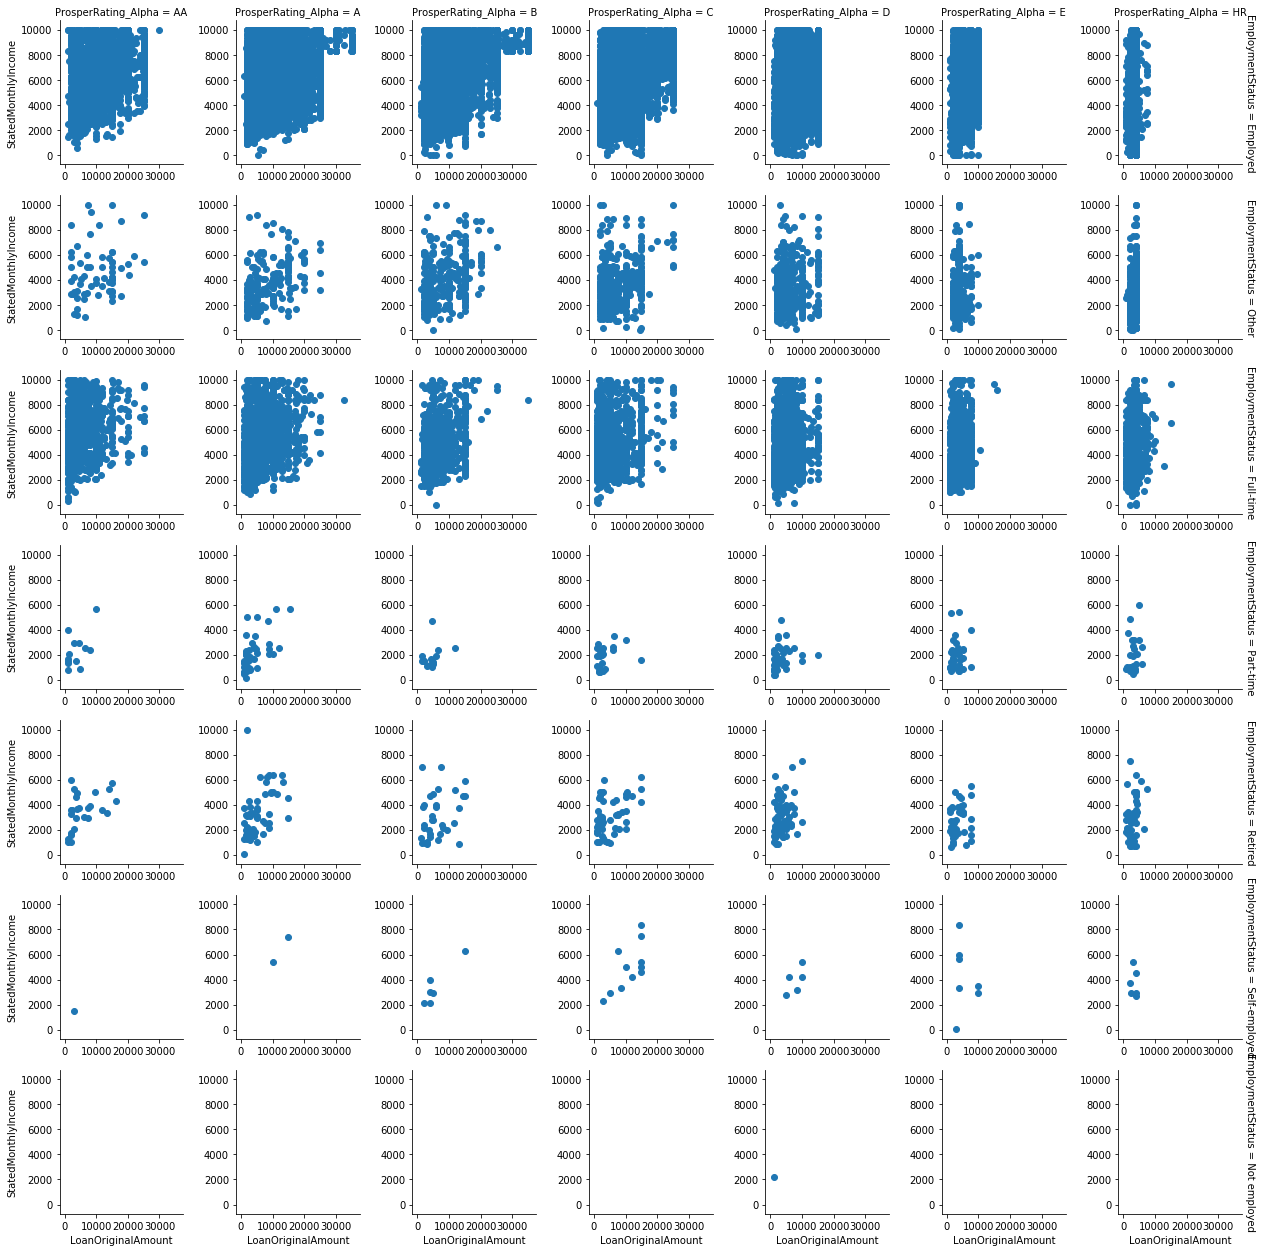

In [118]:
g = sb.FacetGrid(data = loan_df_sub, col = 'ProsperRating_Alpha', row = 'EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

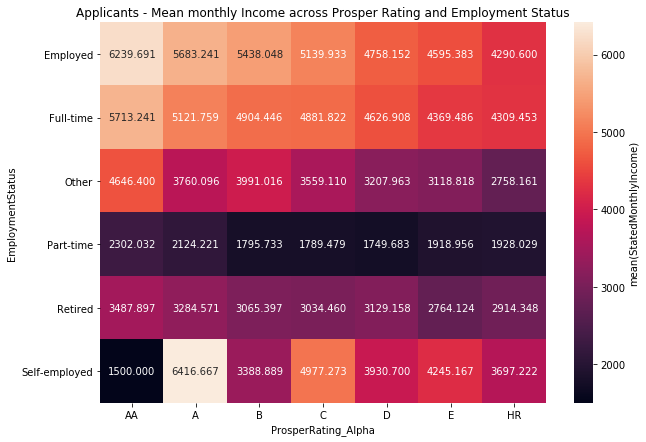

In [119]:
plt.figure(figsize = [10, 7])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');

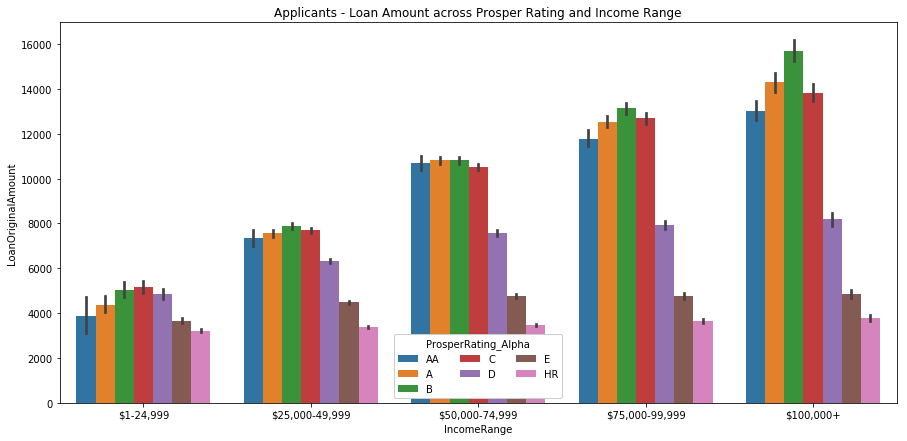

In [120]:
plt.figure(figsize = [15, 7])

ax = sb.barplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'ProsperRating_Alpha')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');

#### Does rating depend on the monhtly income and Employment status?

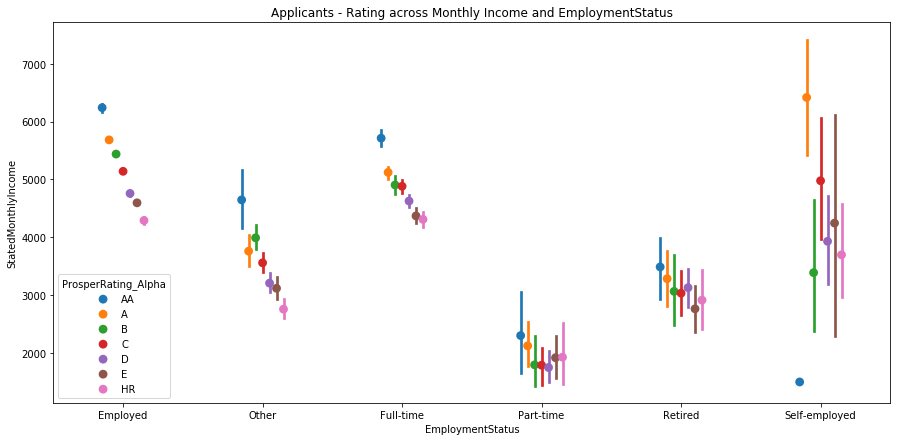

In [121]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

#### Did homeowner status has impacted the ProsperRating and Borrower Interest Rate?

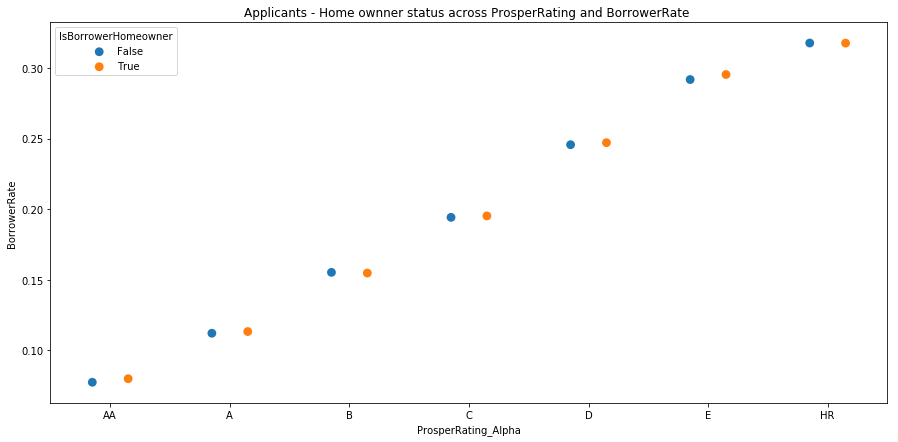

In [122]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = loan_df_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');

#### Insights from the multivariate exploration data

* For Applicants with prosper ratings from AA to D have the higher loan amount with increased salary

* Employed and full time employees have their mean salaries in higher range

* Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

* The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating  of    AA, A and B

* We observe that without homeowner tend to have a higher interest rate, and thus lower rating.However  homeowner tends to have lower interest rate and higher rating.  So we can safely say that homeowner is safest bet when gving a loan. We can also clearly observe that HR prosper rating applicants have higher interest rates

* To conclude this analysis , I say that the loan approval status is heavily dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status.
